In [9]:
### Data Loader Function:

# Group Activity Data Loader:
# 	1. Can return a full image of target frame with its group label (frame, tensor(8)) *needed for B1*. 
# 	2. Can return a all player crops of the target frame with its group label all player have same label  ( (12, crop frame), tensor(1,8)) *needed for B3 step B, C*.
# 	3. Can return a full clip with each frame dir with its group label (all the same) ((9, frame) , tensor(9,8)) *needed for B4*.
#   4. Can return a full clip with all player crop with its group label (all the same) ((12, 9, crop frame), tensor(9,8)) *needed for B5, B6, B7, B8*.

#  Person Activity Data Loader:
# 	1. Can return crop of player image frames in independent way (crop frame , tensor(9)) *needed for B3 step A , B6*.
# 	2. Can return crop of player in the same clip (12 , 9, crop frame) , (tensor(12, 9, 9)) *needed for B5, B7*.
	
# Note:
# 1.  frame and crop frame means all image dim (C, H, W).
# 2.  Group Activity Data Loader Case 1 and 2 only utilize target frame  of each clip

################################################################################################################################
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as T
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torchvision.transforms import v2
from data_loader import Person_Activity_DataSet, Group_Activity_DataSet

dataset_root = "/teamspace/studios/this_studio/Group-Activity-Recognition/data"
annot_path =   f"{dataset_root}/annot_all.pkl"
videos_path =  f"{dataset_root}/videos"

people_activity_clases = ["Waiting", "Setting", "Digging", "Falling" ,"Spiking"	, "Blocking", "Jumping"	, "Moving", "Standing"]
person_activity_labels  = {class_name.lower():i for i, class_name in enumerate(people_activity_clases)}

group_activity_clases = ["r_set", "r_spike" , "r-pass", "r_winpoint", "l_winpoint", "l-pass", "l-spike", "l_set"]
group_activity_labels  = {class_name:i for i, class_name in enumerate(group_activity_clases)}

train_spilt = [1, 3, 6, 7, 10, 13, 15, 16, 18, 22, 23, 31, 32, 36, 38, 39, 40, 41, 42, 48, 50, 52, 53, 54]


### Test people activity data loader

#### 1. Can return crop of player image frames in independent way (crop frame , tensor(9)) *needed for B3 step A , B6*.

In [10]:
transforms = A.Compose([
    A.Resize(224, 224),  
    ToTensorV2()
])

data_loader = Person_Activity_DataSet(videos_path, annot_path, split=train_spilt, seq=False, labels=person_activity_labels, transform=transforms)

In [11]:
len(data_loader)

231327

In [12]:
frame , label = data_loader[0]

label.shape # (,9) class of person activity 

torch.Size([9])

In [13]:
label

tensor([0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)

In [14]:
frame.shape # (C, H, W)

torch.Size([3, 224, 224])

Standing


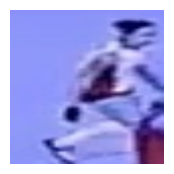

In [15]:
frame , label = data_loader[50]

label_idex = label.argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2)) 
plt.imshow(frame.permute(1,2,0))  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  # Optional: to hide axes
plt.show()

Setting


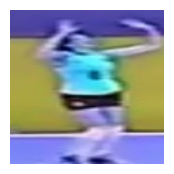

In [16]:
frame , label = data_loader[450]

label_idex = label.argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2)) 
plt.imshow(frame.permute(1,2,0))  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  # Optional: to hide axes
plt.show()

Standing


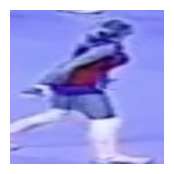

In [17]:
frame , label = data_loader[120]

label_idex = label.argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2)) 
plt.imshow(frame.permute(1,2,0))  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  # Optional: to hide axes
plt.show()

Falling


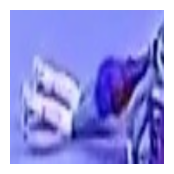

In [18]:
frame , label = data_loader[800]

label_idex = label.argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2)) 
plt.imshow(frame.permute(1,2,0))  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  # Optional: to hide axes
plt.show()

In [19]:
del data_loader

#### 2. Can return crop of player in the same clip (12 , 9, crop frame) , (tensor(12, 9, 9)) *needed for B5, B7*.

In [20]:
# transforms = v2.Compose([
#                 v2.ToPILImage(),    
#                 v2.Resize((28, 28)),
#                 v2.ToImage(), 
#                 v2.ToDtype(torch.float32, scale=True)
#             ])
transforms = A.Compose([
    A.Resize(224, 224),  
    ToTensorV2()
])

data_loader = Person_Activity_DataSet(videos_path, annot_path, split=train_spilt, seq=True, labels=person_activity_labels, transform=transforms)

In [21]:
len(data_loader)

2152

In [22]:
clip, label = data_loader[100]

label.shape # (12 player , 9 frame , label of 9 class)

torch.Size([12, 9, 9])

In [23]:
label[0, 0, :]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)

In [24]:
clip.shape #  (12 player, 9 frame, C, H, W)

torch.Size([12, 9, 3, 224, 224])

Standing


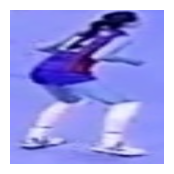

In [25]:
label_idex = label[0, 0].argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2)) # frist player  - first frame
plt.imshow(clip[0, 0].permute(1, 2, 0).numpy())  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  # Optional: to hide axes
plt.show()

Standing


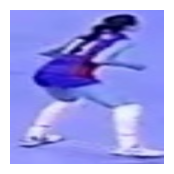

In [26]:
label_idex = label[0, 2].argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2)) # frist player  - Thrid frame
plt.imshow(clip[0, 2].permute(1, 2, 0).numpy())  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  
plt.show()

Standing


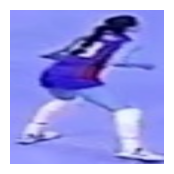

In [27]:
label_idex = label[0, 4].argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2)) 
plt.imshow(clip[0, 4].permute(1, 2, 0).numpy())  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  
plt.show()

Standing


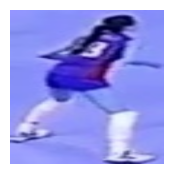

In [28]:
label_idex = label[0, 6].argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2)) 
plt.imshow(clip[0, 6].permute(1, 2, 0).numpy())  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  
plt.show()

Standing


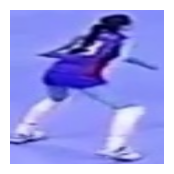

In [29]:
label_idex = label[0, 8].argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2)) # frist player  - last frame
plt.imshow(clip[0, 8].permute(1, 2, 0).numpy())  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  
plt.show()

Standing


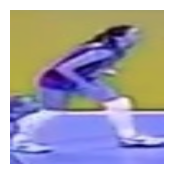

In [30]:
label_idex = label[8, 2].argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2))
plt.imshow(clip[1, 0].permute(1, 2, 0).numpy())  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  
plt.show()

Standing


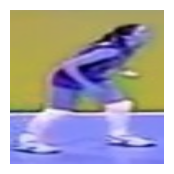

In [31]:
label_idex = label[8, 4].argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2))
plt.imshow(clip[1, 4].permute(1, 2, 0).numpy())  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  
plt.show()

Standing


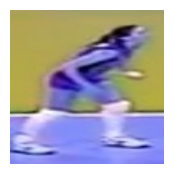

In [32]:
label_idex = label[8, 6].argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2)) 
plt.imshow(clip[1, 6].permute(1, 2, 0).numpy())  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  
plt.show()

Standing


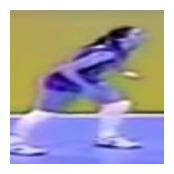

In [33]:
label_idex = label[8, 8].argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2)) # second player  - last frame
plt.imshow(clip[1, 8].permute(1, 2, 0).numpy())  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  
plt.show()


In [34]:
del data_loader

## Test Group Activity data loader

#### 1. Can return a full image of target frame with its group label (frame, tensor(8)) *needed for B1*. 

In [35]:
transforms = A.Compose([
    A.Resize(224, 224),  
    ToTensorV2()
])


data_loader = Group_Activity_DataSet(videos_path, annot_path, split=train_spilt, crops=False , seq=False, labels=group_activity_labels, transform=transforms)

In [36]:
len(data_loader) 

19368

In [37]:
frame , label = data_loader[0]

In [38]:
print(label.shape) # (,8)
label 

torch.Size([8])


tensor([0., 0., 0., 0., 0., 1., 0., 0.])

In [39]:
frame.shape # (C, H , W)

torch.Size([3, 224, 224])

l-pass


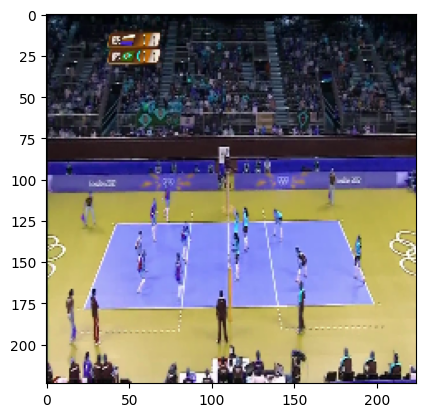

In [40]:
index = data_loader[0][1].argmax().item()
print(f"{group_activity_clases[index]}")

plt.imshow(data_loader[0][0].permute(1,2,0)) 
plt.show()

l-pass


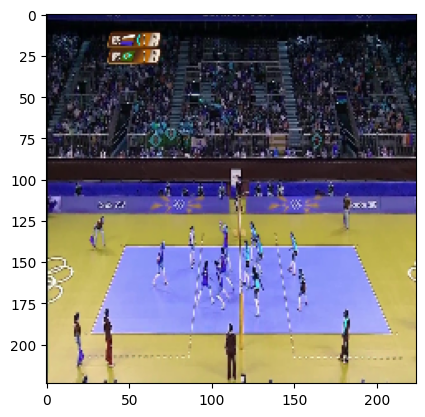

In [41]:
index = data_loader[152][1].argmax().item()
print(f"{group_activity_clases[index]}")

plt.imshow(data_loader[152][0].permute(1,2,0))
plt.show()

#### 2. Can return a all player crops of the target frame with its group label (all player have same label)  ( (12, crop frame), tensor(1,8)) *needed for B3 step B, C*.

In [42]:
transforms = A.Compose([
    A.Resize(224, 224),  
    ToTensorV2()
])

data_loader= Group_Activity_DataSet(videos_path, annot_path, split=train_spilt, crops=True , seq=False, labels=group_activity_labels, transform=transforms)

In [43]:
len(data_loader) # the differents between case 1 and 2 the input consist of 12 bbox

19368

In [44]:
frame_crops, label = data_loader[152]

In [45]:
print(label.shape) # (,8)
label

torch.Size([8])


tensor([0., 0., 0., 0., 0., 1., 0., 0.])

In [46]:
frame_crops.shape # (12, C, H, W) ---> 12 bbox of the frame

torch.Size([12, 3, 224, 224])

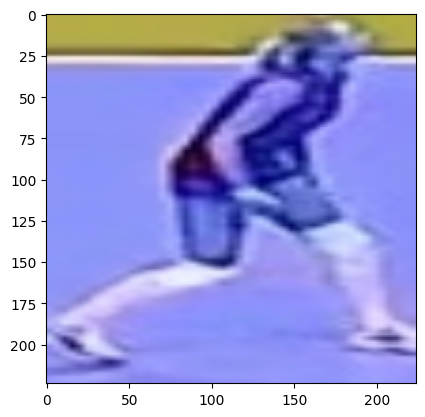

In [47]:
plt.imshow(frame_crops[0].permute(1,2,0))  # first bbox of the fraem
plt.show()

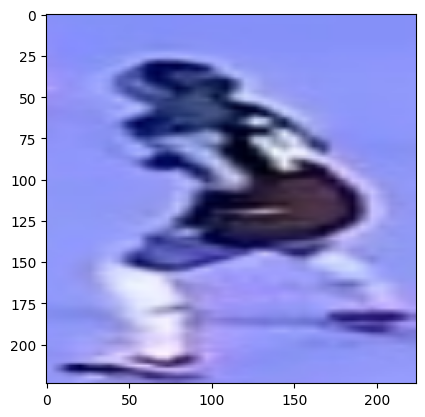

In [48]:
plt.imshow(frame_crops[11].permute(1,2,0))  # last bbox of the frame
plt.show()

In [49]:
del data_loader

#### 3. Can return a full clip with each frame dir with its group label (all the same) ((9, frame) , tensor(9,8)) *needed for B4*.

In [50]:
transforms = A.Compose([
    A.Resize(224, 224),  
    ToTensorV2()
])

data_loader = Group_Activity_DataSet(videos_path, annot_path, split=train_spilt, crops=False , seq=True, labels=group_activity_labels, transform=transforms)

In [51]:
len(data_loader)

2152

In [52]:
clip , label = data_loader[100] 
clip.shape # (9 frames, C, H, W)

torch.Size([9, 3, 224, 224])

In [53]:
group_activity_labels

{'r_set': 0,
 'r_spike': 1,
 'r-pass': 2,
 'r_winpoint': 3,
 'l_winpoint': 4,
 'l-pass': 5,
 'l-spike': 6,
 'l_set': 7}

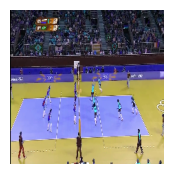

In [54]:
plt.figure(figsize=(2, 2)) # First frame of the clip
plt.imshow(clip[0].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

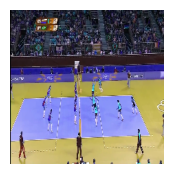

In [55]:
plt.figure(figsize=(2, 2)) # second frame of the clip
plt.imshow(clip[1].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

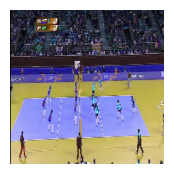

In [56]:
plt.figure(figsize=(2, 2)) 
plt.imshow(clip[2].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

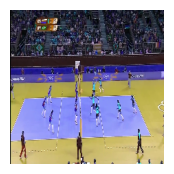

In [57]:
plt.figure(figsize=(2, 2)) 
plt.imshow(clip[3].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

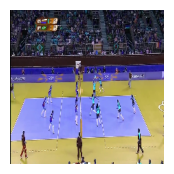

In [58]:
plt.figure(figsize=(2, 2)) 
plt.imshow(clip[4].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

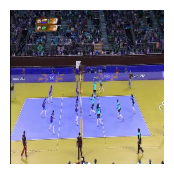

In [59]:
plt.figure(figsize=(2, 2)) 
plt.imshow(clip[5].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

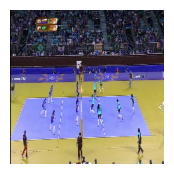

In [60]:
plt.figure(figsize=(2, 2)) 
plt.imshow(clip[6].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

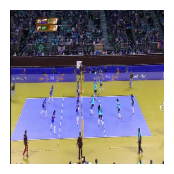

In [61]:
plt.figure(figsize=(2, 2)) 
plt.imshow(clip[7].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

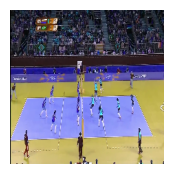

In [62]:
plt.figure(figsize=(2, 2)) # Last frame of the clip
plt.imshow(clip[8].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

In [63]:
del data_loader

#### 4. Can return a full clip with all player crop with its group label (all the same) ((12, 9, crop frame), tensor(9,8)) *needed for B5, B6, B7, B8*.

In [64]:
transforms = A.Compose([
    A.Resize(224, 224),  
    ToTensorV2()
])

data_loader = Group_Activity_DataSet(videos_path, annot_path, split=train_spilt, crops=True , seq=True, labels=group_activity_labels, transform=transforms)

In [65]:
len(data_loader)

19368

In [66]:
clip, label = data_loader[0]

In [67]:
label.shape # (9, 8) each frame has the same label

torch.Size([9, 8])

In [68]:
label

tensor([[0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.]])

In [69]:
clip.shape # (12, 9, C, H, W) 12 player , 9 frames, Channls , High, Width

torch.Size([12, 9, 3, 224, 224])

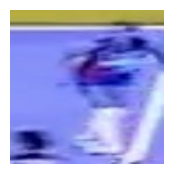

In [70]:
plt.figure(figsize=(2, 2)) # first player - first frame
plt.imshow(clip[0][0].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

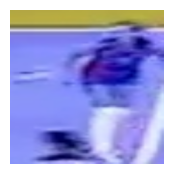

In [71]:
plt.figure(figsize=(2, 2)) # first player - second frame
plt.imshow(clip[0][1].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

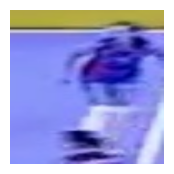

In [73]:
plt.figure(figsize=(2, 2)) # first player - thrid frame
plt.imshow(clip[0][2].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

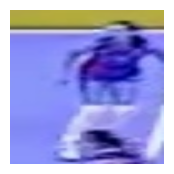

In [74]:
plt.figure(figsize=(2, 2)) # first player - fourth frame
plt.imshow(clip[0][3].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

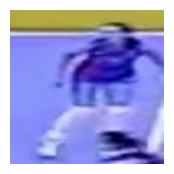

In [75]:
plt.figure(figsize=(2, 2)) # first player - fifth frame
plt.imshow(clip[0][4].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

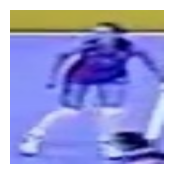

In [76]:
plt.figure(figsize=(2, 2)) # first player - sixth frame
plt.imshow(clip[0][5].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

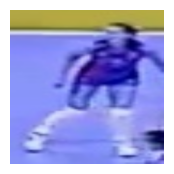

In [77]:
plt.figure(figsize=(2, 2)) # first player - seventh frame
plt.imshow(clip[0][6].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

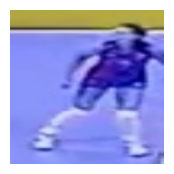

In [78]:
plt.figure(figsize=(2, 2)) # first player - eighth frame
plt.imshow(clip[0][7].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

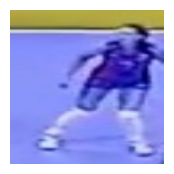

In [79]:
plt.figure(figsize=(2, 2)) # first player - last frame
plt.imshow(clip[0][8].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()